## Обучение без учителя

Основное отличие методов обучения без учителя от привычных классификаций и регрессий машинного обучения в том, что разметки для данных в этом случае нет. От этого образуются сразу несколько особенностей — во-первых это возможность использования несопоставимо больших объёмов данных, поскольку их не нужно будет размечать руками для обучения, а во-вторых это неясность измерения качества методов, из-за отсутствия таких же прямолинейных и интуитивно понятных метрик, как в задачах обучения с учителем.

Одной из самых очевидных задач, которые возникают в голове в отсутствие явной разметки, является задача снижения размерности данных. С одной стороны её можно рассматривать как помощь в визуализации данных, для этого часто используется метод t-SNE. С другой стороны подобное снижение размерности может убрать лишние сильно скоррелированные признаки у наблюдений и подготовить данные для дальнейшей обработки в режиме обучения с учителем, например сделать входные данные более "перевариваемыми" для деревьев решений.

## Метод главных компонент (PCA)

Метод главных компонент (Principal Component Analysis) — один из самых интуитивно простых и часто используемых методов для снижения размерности данных и проекции их на ортогональное подпространство признаков.

В совсем общем виде это можно представить как предположение о том, что все наши наблюдения скорее всего выглядят как некий эллипсоид в подпространстве нашего исходного пространства и наш новый базис в этом пространстве совпадает с осями этого эллипсоида. Это предположение позволяет нам одновременно избавиться от сильно скоррелированных признаков, так как вектора базиса пространства, на которое мы проецируем, будут ортогональными.

В общем случае размерность этого эллипсоида будет равна размерности исходного пространства, но наше предположение о том, что данные лежат в подпространстве меньшей размерности, позволяет нам отбросить "лишнее" подпространство в новой проекции, а именно то подпространство, вдоль осей которого эллипсоид будет наименее растянут. Мы будем это делать "жадно", выбирая по-очереди в качестве нового элемента базиса нашего нового подпространства последовательно ось эллипсоида из оставшихся, вдоль которой дисперсия будет максимальной.

Рассмотрим как это делается математически:

Чтобы снизить размерность наших данных из $n$ в $k, k \leq n$, нам нужно выбрать топ-$k$ осей такого эллипсоида, отсортированные по убыванию по дисперсии вдоль осей.

Начнём с того, что посчитаем дисперсии и ковариации исходных признаков. Это делается просто с помощью матрицы ковариации.

При этом отметим, что ковариация симметрична и ковариация вектора с самим собой будет равна его дисперсии.

Таким образом матрица ковариации представляет собой симметричную матрицу, где на диагонали лежат дисперсии соответствующих признаков, а вне диагонали — ковариации соответствующих пар признаков. 

Чтобы освежить память — у матриц как у линейных операторов есть такое интересное свойство как собственные значения и собственные вектора (eigenvalues и eigenvectors). Эти штуки замечательны тем, что когда мы нашей матрицей действуем на соответствующее линейное пространство, собственные вектора остаются на месте и лишь умножаются на соответствующие им собственные значения. То есть определяют подпространство, которое при действии этой матрицей как линейным оператором, остаётся на месте или "переходит в себя". Формально собственный вектор $w_i$ с собственным значением $\lambda_i$ для матрицы $M$ определяется просто как $M w_i = \lambda_i w_i$.

Матрицу ковариации для нашей выборки $\mathbf{X}$ можно представить в виде произведения $\mathbf{X}^{T} \mathbf{X}$. Из отношения Релея вытекает, что максимальная вариация нашего набора данных будет достигаться вдоль собственного вектора этой матрицы, соответствующего максимальному собственному значению. Таким образом главные компоненты, на которые мы бы хотели спроецировать наши данные, являются просто собственными векторами соответствующих топ-$k$ штук собственных значений этой матрицы.

Дальнейшие шаги просты до безобразия — надо просто умножить нашу матрицу данных на эти компоненты и мы получим проекцию наших данных в ортогональном базисе этих компонент. Теперь если мы транспонируем нашу матрицу данных и матрицу векторов главных компонент, мы восстановим исходную выборку в том пространстве, из которого мы делали проекцию на компоненты. Если количество компонент было меньше размерности исходного пространства, мы потеряем часть информации при таком преобразовании.

<ipython-input-15-3e9725c296d7>:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
<ipython-input-15-3e9725c296d7>:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_clr = np.choose(y, [1, 2, 0]).astype(np.float)


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

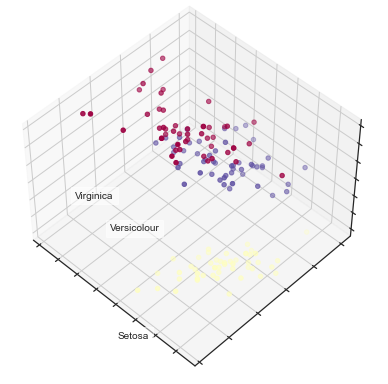

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Загрузим наши ириски
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Заведём красивую трёхмерную картинку
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.Spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


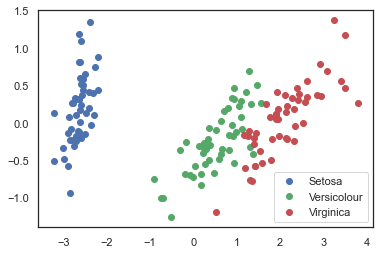

In [17]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [18]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


In [19]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)
